In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
df_M_A = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/에어비스_M.csv', index_col = 0)
df_PC_A = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/에어비스_PC.csv', index_col = 0)
df_M_B = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/장지_M.csv', index_col = 0)
df_PC_B = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/장지_PC.csv', index_col = 0)
df_M_C = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/오형짱_M.csv', index_col = 0)
df_PC_C = pd.read_csv('C:/Users/dhckd/Study/CodingWorld/기술과제들/네오플/오형짱_PC.csv', index_col = 0)

In [4]:
# 모두 합친 뒤, groupby로 날짜별 조회수 구하기
df_M = pd.concat([df_M_A, df_M_B, df_M_C])
df_PC = pd.concat([df_PC_A, df_PC_B, df_PC_C])

## 던파 PC

In [9]:
# 데이터 필터링. 
# - 값 가진 데이터 제거
condition = df_PC.video_id != '-'
df_PC_new = df_PC.loc[condition, :]
# 2월 24일 이후 데이터 확인. 던파 PC가 던파 M이 출시됨에 따라 조회수가 변동하였는지 보기위해
condition2 = df_PC_new.date >= '2022-02-24'
df_PC_new = df_PC_new.loc[condition2, :]
# 결측값 제거
df_PC_new = df_PC_new.dropna()

# views 데이터 타입 str에서 int로 변경
df_PC_new = df_PC_new.astype({'views':'int'})

# group by
df_PC_new_views = df_PC_new.groupby('date').sum()

<BarContainer object of 53 artists>

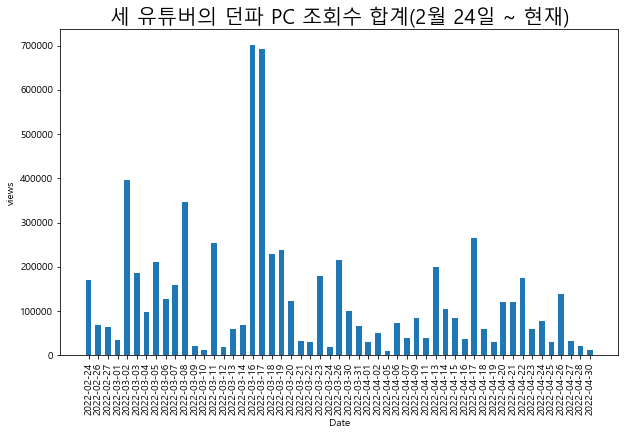

In [10]:
xs = df_PC_new_views.index
ys = df_PC_new_views['views']
plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Date') #그래프 x축 이름(label) 지정
plt.ylabel('views') #그래프 y축 이름(label) 지정
plt.xticks(rotation = 90)
plt.title('세 유튜버의 던파 PC 조회수 합계(2월 24일 ~ 현재)',fontsize=20) ## 타이틀 설정
plt.bar(xs, ys, width=0.6) #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯

## 던파 M

In [5]:
# 데이터 필터링. 
# - 값 가진 데이터 제거
condition = df_M.video_id != '-'
df_M_new = df_M.loc[condition, :]
# 2월 24일 이후 데이터 확인. 던파 PC가 던파 M이 출시됨에 따라 조회수가 변동하였는지 보기위해
condition2 = df_M_new.date >= '2022-03-24'
df_M_new = df_M_new.loc[condition2, :]
# 결측값 제거
df_M_new = df_M_new.dropna()

# views 데이터 타입 str에서 int로 변경
df_M_new = df_M_new.astype({'views':'int'})

# group by
df_M_new_views = df_M_new.groupby('date').sum()

<BarContainer object of 37 artists>

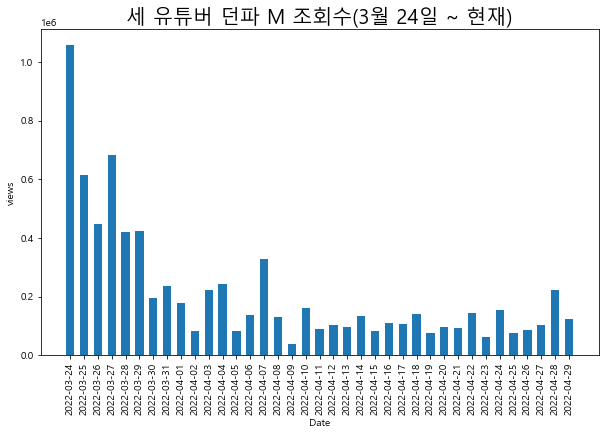

In [8]:
xs = df_M_new_views.index
ys = df_M_new_views['views']
plt.figure(figsize=(10, 6)) #그래프 크기 지정
plt.xlabel('Date') #그래프 x축 이름(label) 지정
plt.ylabel('views') #그래프 y축 이름(label) 지정
plt.xticks(rotation = 90)
plt.title('세 유튜버의 던파 M 조회수 합계(3월 24일 ~ 현재)',fontsize=20) ## 타이틀 설정
plt.bar(xs, ys, width=0.6) #리스트로 저장한 xs와 ys로 막대(bar) 그래프 플롯